# Project 8

Upon completion, please remember to download your notebook, both as
`.ipynb` and `.html`.

You are the founder of a company that is looking to enter two new industries: the auto industry and the food industry. To compare the projects, your investors would like to see MVPs (Minimum Viable Products) (click [here](https://en.wikipedia.org/wiki/Minimum_viable_product) for more info) for each. You must, in one week’s time, prove that the machine learning capabilities work in both projects. Using your extensive knowledge of data science, you decide that the best model for both projects is SVM (Support Vector Machines). Therefore, you must fit SVMs for both projects and demonstrate their efficacy.

In this assignment, we will be using PennGrader, a Python package built by a former TA for autograding Python notebooks. PennGrader was developed to provide students with instant feedback on their answer. You can submit your answer and know whether it's right or wrong instantly. We then record your most recent answer in our backend database. You will have 100 attempts per test case, which should be more than sufficient.

<b>NOTE：Please remember to remove the </b>

```python
raise notImplementedError
```
<b>after your implementation, otherwise the cell will not compile.</b>

## Getting Set Up
Meet our old friend - PennGrader! Fill in the cell below with your PennID and then run the following cell to initialize the grader.

<font color='red'>Warning:</font> Please make sure you only have one copy of the student notebook in your directory in Codio upon submission. The autograder looks for the variable `STUDENT_ID` across all notebooks, so if there is a duplicate notebook, it will fail.

In [1]:
#PLEASE ENSURE YOUR STUDENT_ID IS ENTERED AS AN INT (NOT A STRING). IF NOT, THE AUTOGRADER WON'T KNOW WHO 
#TO ASSIGN POINTS TO YOU IN OUR BACKEND

STUDENT_ID = 57896367                   # YOUR 8-DIGIT PENNID GOES HERE
STUDENT_NAME = "Emmanuel Murerwa"     # YOUR FULL NAME GOES HERE

In [2]:
import penngrader.grader

grader = penngrader.grader.PennGrader(homework_id = 'ESE305_FA_2021_HW8', student_id = STUDENT_ID)

In [3]:
# Let's import the relevant Python packages here
# Feel free to import any other packages for this project

#Data Wrangling
import pandas as pd
import numpy as np

from sklearn.svm import SVR, SVC

#Metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import KFold, GridSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.neural_network import MLPRegressor

#Plotting
import matplotlib.pyplot as plt
import matplotlib as mpl


Before beginning, please run the following commands in the Codio terminal. After doing so, restart the kernel.

In [4]:
pip install Pillow --user


The following command must be run outside of the IPython shell:

    $ pip install Pillow --user

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more informations on how to install packages:

    https://docs.python.org/3/installing/


## Part A: The Auto Business

Understanding the data is vital in any study, as we do not want to mix up categorial with numerial data.

This dataset has 9 variables:
    
| Variable | Description |
| --- | --- | 
| <b> mpg </b> | miles per gallon |
| <b> cylinders </b> | Number of cylinders between 4 and 8 |
| <b> displacement </b> | Engine displacement (cu. inches) |
| <b> horsepower </b> | Engine horsepower |
| <b> weight </b> | Vehicle weight (lbs.) |
| <b> acceleration </b> | Time to accelerate from 0 to 60 mph (sec.) |
| <b> year </b> | Model year (modulo 100) |
| <b> origin </b> | Origin of car (1. American, 2. European, 3. Japanese) |
| <b> name </b> | Vehicle name |

In [5]:
data = pd.read_csv('Auto.csv').copy() #import 

1. <b>What is the range of ‘year’?</b> Storre your solution in `yr_range` as (min_year, max_year)

In [6]:
yr_range = ( data['year'].min(), data['year'].max())

In [7]:
grader.grade(test_case_id = 'test_year_range', answer = yr_range)

Correct! You earned 1.0/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


2. Create a binary output variable that takes on a $1$ for cars with gas mileage above the median, and a $0$ for cars with gas mileage below the median. Name this column `above_median`, append this column to your `data` dataframe.

In [8]:
median = data['mpg'].median()
data['above_median'] = [1 if x > median else 0 for x in data['mpg']]
above_median = data['above_median']
data.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0         130    3504          12.0    70   
1  15.0          8         350.0         165    3693          11.5    70   
2  18.0          8         318.0         150    3436          11.0    70   
3  16.0          8         304.0         150    3433          12.0    70   
4  17.0          8         302.0         140    3449          10.5    70   

   origin                       name  above_median  
0       1  chevrolet chevelle malibu             0  
1       1          buick skylark 320             0  
2       1         plymouth satellite             0  
3       1              amc rebel sst             0  
4       1                ford torino             0

In [9]:
grader.grade(test_case_id = 'test_ab_median', answer = above_median)

Correct! You earned 1.0/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


3. Fit a Support Vector Classiﬁer to the data with the default total slack budget (cost value), $C$ of $1.0$ and a <b>linear kernel</b>, in order to predict whether a car gets high or low gas mileage (i.e., the binary variable from Step 2). Find the accuracy of your model using one trial of 5-fold cross validation with `random_state=22`. Comment on your results and back up your assertions with plots. Store the test accuracy score using 5-fold cross validation in `k_fold_accuracy`.

*Hint*: Do not use 'name' or 'mpg' as predictors. Also remember to standardize your data using `sklearn.preprocessing.scale` before employing SVC. To calculate the accuracy of your model, use the <b>averaged</b> `cross_val_score`. 

In [10]:
np.random.seed(22)
X= scale(data.drop(columns=['mpg', 'name', 'above_median', 'origin']))
y = data[['above_median']]

cv_method = KFold(n_splits=5,shuffle=True,random_state = 22) #Define CV method
model = SVC(C=1.0, kernel="linear")
k_fold_accuracy = np.mean(cross_val_score(model,X,y.values.ravel(),cv = cv_method,scoring = 'accuracy')) #Run cross validation with a score
k_fold_accuracy                

0.8928270042194093

In [11]:
grader.grade(test_case_id = 'test_SVC', answer = k_fold_accuracy)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


4. Fit a Support Vector Classiﬁer to the data with total slack budget (cost values), $C$ of $\{0.001, 0.01, 0.1, 1\}$ in order to predict whether a car gets high or low gas mileage. Report the accuracy of your model using 10 trials of 5-fold cross validation with `random_state=trial` (the trial number currently running in the for-loop) and `gamma='auto'` for each of the cost values. Create a variable named `accuracies` which contains the mean accuracy of each of your four cost values. Comment on your results and back up your assertions with plots. Store the best-performing $C$ in `C_best`

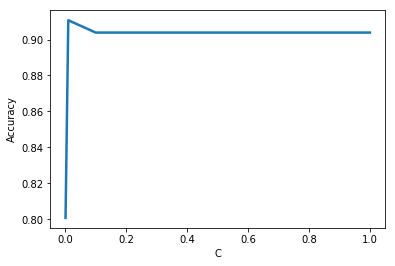

[0.8007530022719896,
 0.9107140538786108,
 0.9038493995456021,
 0.9038526452450503]

In [12]:
#Vary the cost value for linear SVC
cost_values = [0.001, 0.01, 0.1, 1] #Try these for now, add different values if time allots

accuracies = []
for c in cost_values:
    kaccuracies = []
    for trial in range(10):
        cv_method = KFold(n_splits=5,shuffle=True,random_state = trial) #Define CV method
        model = SVC(C=c, kernel='linear', gamma='auto', random_state=1)
        acc = np.mean(cross_val_score(model,X,y.values.ravel(),cv = cv_method,scoring = 'accuracy')) #Run cross validation with a score
        kaccuracies.append(acc)
    accuracies.append(np.mean(kaccuracies))

plt.plot(cost_values, accuracies, linewidth=2.5)
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.show()

accuracies

In [13]:
C_best = '0.01'  # Enter a number

In [14]:
grader.grade(test_case_id = 'test_SVC_tune', answer = (accuracies, C_best))

Correct! You earned 2.0/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


5. Repeat the process in Part A Step 4, this time using SVMs with radial (rbf) basis kernels, with diﬀerent values of gamma, and cost. Store your best-performing parameters in `radial_best_params`; store your test accuracy using best performing parameters in`radial_score`. Use the following parameters for your search:

    - Slack budget/Cost value:  {0.001,0.01,0.1,1,1.25,1.5,1.75,2,2.25,2.5,2.75,3,10} 
    - Gamma:  {0.001,0.025,0.05,0.075,0.1,0.125,0.15,0.2,1} 
    - Cross validation: 5-fold
    - Scoring: ‘accuracy’
    - kernel: 'rbf'

*Hint*: Familiarize yourself with GridSearchCV. Because tuning non-linear SVMs take a long time, GridSearchCV will efficiently tune these parameters for your model. 

In [15]:
Cs = [0.001, 0.01, 0.1, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 10]
gammas = [0.001, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.2, 1]
param_grid = {'C': Cs, 'gamma' : gammas}

clf = GridSearchCV(SVC(kernel='rbf'),param_grid, scoring='accuracy') #Defaults to 5-fold CV
clf.fit(X, y.values.ravel())
print(clf.best_params_)

{'C': 0.1, 'gamma': 0.05}


In [16]:
cv_method = KFold(n_splits=5,shuffle=True,random_state = 22) #Define CV method
model = SVC(C=0.1, kernel='rbf', gamma=0.05)
k_fold_accuracy = np.mean(cross_val_score(model,X,y.values.ravel(),cv = cv_method,scoring = 'accuracy')) #Run cross validation with a score
k_fold_accuracy   

0.9131775397598183

In [17]:
radial_best_params = clf.best_params_
radial_score = k_fold_accuracy

In [18]:
grader.grade(test_case_id = 'test_radial_gsCV', answer = (radial_best_params, radial_score))

Correct! You earned 2.0/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


6. Similar with question 5, but this time use a polynomial('poly') kernel instead. Store the best-performing parameters and test accuracy within `poly_best_params` and `poly_score`. Use the following parameters for your search:

    - Slack budget/Cost value:  {0.001,0.01,0.1,1,1.25,1.5,1.75,2,2.25,2.5,2.75,3,10} 
    - Gamma:  {0.001,0.025,0.05,0.075,0.1,0.125,0.15,0.2,1} 
    - Degree:  {0.5,1,2,3,4,5} , only used for polynomial kernel
    - Cross validation: 5-fold
    - Scoring: ‘accuracy’
    - kernel: 'poly'

In [19]:
Cs = [0.001, 0.01, 0.1, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 10]
gammas = [0.001, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.2, 1]
degrees = [0.5, 1, 2, 3, 4, 5]

In [20]:
param_grid = {'C': Cs, 'gamma' : gammas, 'degree': degrees}

clf = GridSearchCV(SVC(kernel='poly'), param_grid, scoring='accuracy') #Defaults to 5-fold CV
clf.fit(X, y.values.ravel())
print(clf.best_params_)

poly_best_params = clf.best_params_

{'C': 0.01, 'degree': 1, 'gamma': 1}


In [21]:
cv_method = KFold(n_splits=5,shuffle=True,random_state = 22) #Define CV method
model = SVC(C=0.01, kernel='poly', gamma=1, degree=1)
k_fold_accuracy = np.mean(cross_val_score(model,X,y.values.ravel(),cv = cv_method,scoring = 'accuracy')) #Run cross validation with a score
k_fold_accuracy 

0.9106134371957157

In [22]:
poly_score = k_fold_accuracy 

In [23]:
grader.grade(test_case_id = 'test_poly_gsCV', answer = (poly_best_params, poly_score))

Correct! You earned 2.0/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


8. Comment on your overall observations. Would this MVP be satisfactory for your investors?

In [24]:
#Yes it will be satisfactory

## Part B: The Food Business

Your second idea is an app that classifies images: SeeFood. For your MVP, you decide to show your Silicon Valley investors an app that classifies food images as ‘hot dog’ or ‘not hot dog’—an \$8 million opportunity indeed<sup>1</sup>. To build this app, you have collected the following sample food images from the Food101 dataset:

- 325 training images labeled  'hot dog'
- 300 training images labeled  'not hot dog'
- 40 test images labeled  'hot dog'
- 35 test images labeled  'not hot dog'

Your goal is to build a model that correctly labels the test images. From your experience working on the Auto MVP, you decide to use a polynomial SVM model for this project; however, due to time limitations, you decide not to tune your SVM.

<sup>1</sup> To read about the data science behind how the show Silicon Valley built this app, read [this Medium article](https://medium.com/@timanglade/how-hbos-silicon-valley-built-not-hotdog-with-mobile-tensorflow-keras-react-native-ef03260747f3).

1. Using the `get_data()` method below, first convert the image data into `Numpy` arrays.

In [25]:
import os
from PIL import Image
def get_data(dir):
    
    images = []
    data = []

    categories = ['not_hot_dog', 'hot_dog']
    for category in categories:
        path = os.path.join(dir, category) # Parse the path
        label = categories.index(category) # 1 for hot_dog

        for file in os.listdir(path): # For each image
            filepath = os.path.join(path, file)
            img = Image.open(filepath)
            resized_img = img.resize((100,100), Image.ANTIALIAS) # Resize to 100x100
            img_array = np.array(resized_img).flatten() # Flatten the array to 1D
            data.append([img_array, label]) # Append the image's array with its label
            images.append(resized_img) # Save the images so they can be opened later
    
    return data, images

In [26]:
[train_data , train_images] = np.array(get_data('hot_dog_dataset/hot_dog_dataset/train'))
[test_data , test_images] = np.array(get_data('hot_dog_dataset/hot_dog_dataset/test'))
X_train = [tr[0] for tr in train_data]
y_train = [tr[1] for tr in train_data]
X_test = [te[0] for te in test_data]
y_test = [te[1] for te in test_data]

In [27]:
grader.grade(test_case_id = 'test_train', answer = (len(X_train), len(X_train[0])))

Correct! You earned 0.5/0.5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [28]:
grader.grade(test_case_id = 'test_test', answer = (len(X_test), len(X_test[0])))

Correct! You earned 0.5/0.5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


2. Standardize `X_train` and `X_test` using `sklearn.preprocessing.scale`, in preparation for applying SVM. Hint: Scale each image individually.

In [29]:
X_train = [scale(X_train[i]) for i in range(len(X_train))]
X_test = [scale(X_test[i]) for i in range(len(X_test))]

In [30]:
grader.grade(test_case_id = 'test_scale', answer = (np.sum(X_train[:10]), np.sum(X_test[:10])))

Correct! You earned 1.0/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


3. Fit a polynomial SVM on your training data with all default parameters. Report the accuracy of the model as `training_accuracy` and `test_accuracy`. Define the predicted values as `y_pred_train` and `y_pred_test`. 

In [34]:
clf = SVC(kernel='poly')
clf.fit(X_train, y_train)

y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

training_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)
print(training_accuracy)
print(test_accuracy)

1.0
0.6133333333333333


In [35]:
grader.grade(test_case_id = 'test_SVC2', answer = (training_accuracy, test_accuracy))

Correct! You earned 2.0/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


4. What are the confusion matrices for both the training set and the test set, store them in `train_confusion` and `test_confusion`? What is the True Positive Rate for the test set, store your answer in `TP_test`?

In [37]:
train_confusion = confusion_matrix(y_train, y_pred_train)
train_confusion

array([[300,   0],
       [  0, 325]])

In [38]:
grader.grade(test_case_id = 'test_train_confu', answer = train_confusion)

Correct! You earned 1.0/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [39]:
test_confusion = confusion_matrix(y_test, y_pred_test)
TP_test = 32/(32+8)
test_confusion

array([[14, 21],
       [ 8, 32]])

In [40]:
grader.grade(test_case_id = 'test_test_score', answer = (test_confusion, TP_test))

Correct! You earned 1.0/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


5. Plot the ROC curve for your model using the `plot_roc()` method below. Comment on your observations. 

In [41]:
def plot_roc(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test))
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
    return fpr, tpr, thresholds

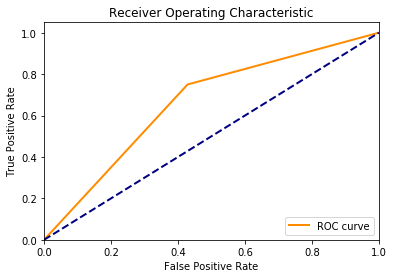

(array([0.        , 0.42857143, 1.        ]),
 array([0.  , 0.75, 1.  ]),
 array([2, 1, 0]))

In [42]:
# plot here and leave comments
plot_roc(model, X_train, y_train, X_test, y_test)

6. Encode the predicated values as ‘hot_dog’ for ‘1’ and ‘not_hot_dog’ for ‘0’. Using the show_images() method below, show your results for both your training set and your test set, with the title of each image being your predicted value. Comment on your results.

In [43]:
y_pred_train_encoded = ['hot_dog' if x == 1 else 'not_hot_dog' for x in y_pred_train]
y_pred_test_encoded = ['hot_dog' if x == 1 else 'not_hot_dog' for x in y_pred_test]

In [44]:
def show_images(image_array, labels):
    
    import matplotlib.pyplot as plt
    from matplotlib import gridspec

    size = len(image_array)
    index = 1
    fig = plt.figure(figsize=(20,100))
    
    for image in image_array:
        fig.add_subplot(int(size/5), 5, index)
        plt.imshow(image)
        plt.title(labels[index-1])
        plt.axis('off')
        index += 1
    plt.show()

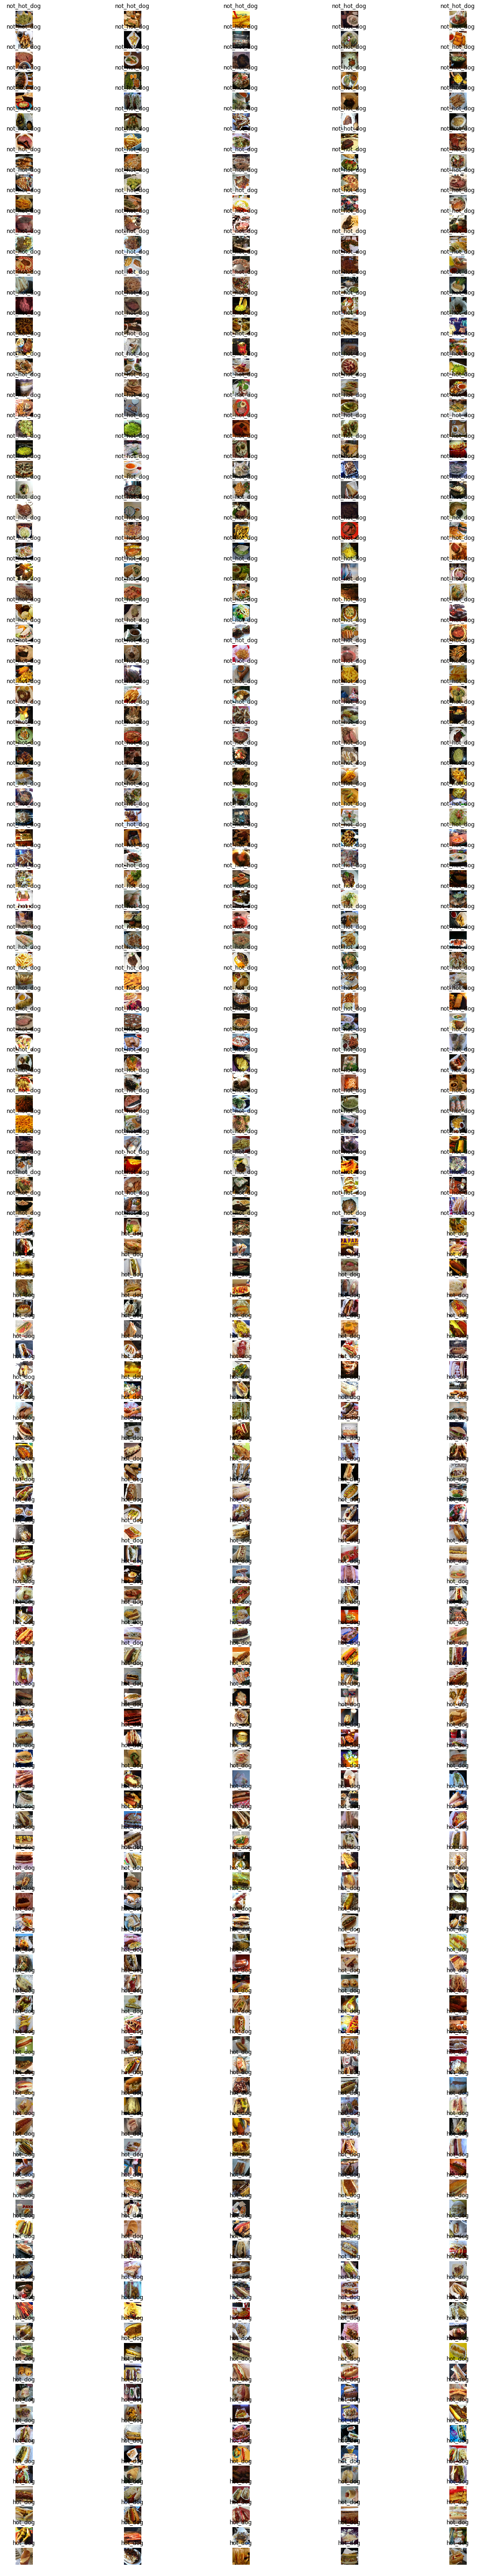

In [45]:
show_images(train_images, y_pred_train_encoded)

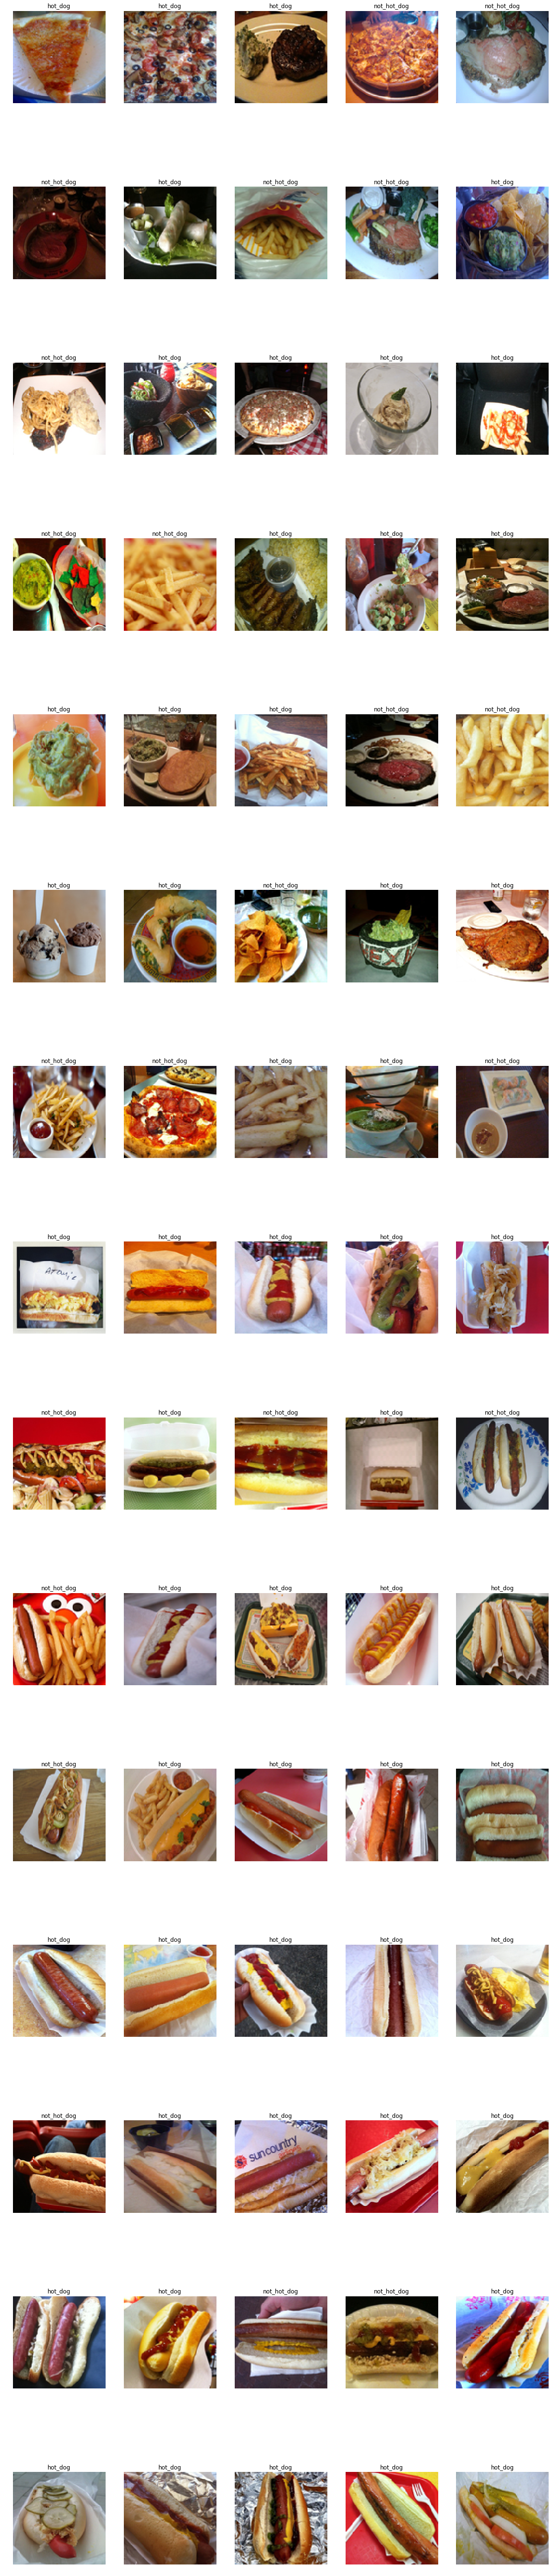

In [46]:
show_images(test_images, y_pred_test_encoded)

In [47]:
# It seems to be working fine, but with a few errors.

## Part C: The One Billion Dollar Decision

The following questions are optional and ungraded, but are interesting to think about: 

1. Which of the two projects should your company pursue? Why?
2. Constant iteration is needed for a product to improve. How would you improve upon these projects in preparation for the launch of your startup?
3. Pitch your company to investors. What is unique about your project(s)? Did you use any special preprocessing methods or models?

In [48]:
#Project 1.

## Part D: Neural Networks

Although Support Vector Machines performed adequately on the prediction tasks above, neural networks usually will outperform them. Let's explore how they perform on the `Auto` dataset!

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

data = pd.read_csv('Auto.csv').copy()
X_train, X_test, y_train, y_test = train_test_split(data[['cylinders','displacement','horsepower','weight','acceleration','year']], data['mpg'], random_state=1)

1. Using [SkLearn's MLPRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html), fit a neural network with hidden layer sizes [64,64,32], a ReLU activation, an adaptive learning rate, a max iterations of 500, and `random_state` of 1. Find the model's performance on the test set in terms of mean squared error, and save the value of this error in `mse_loss`.

In [50]:
regr = MLPRegressor(hidden_layer_sizes = (64,64,32), activation = 'relu', learning_rate = 'adaptive', random_state=1, max_iter=500).fit(X_train, y_train)
regr.predict(X_test[:2])
regr.score(X_test, y_test)

#mse_loss = regr.score(X_test, y_test)
mse_loss = mean_squared_error(regr.predict(X_test), y_test)
mse_loss

18.775499112966248

In [51]:
grader.grade(test_case_id = 'test_MPRegressor', answer = mse_loss)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


2. Continuing to use [SkLearn's MLPRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html) and `random_state` of 1, find a combination of hyperparamters that outperforms the above model. Pass the fit model into `better_performing_model`. The grader cell is immutable, but will display your current results.

In [54]:
better_performing_model = MLPRegressor(hidden_layer_sizes = (64,64,32,32), activation = 'relu', learning_rate = 'adaptive', random_state=1, max_iter=500).fit(X_train, y_train)

In [55]:
mse_loss = mean_squared_error(better_performing_model.predict(X_test), y_test)
print(f'This model\'s test loss is: {mse_loss}')
random_state = better_performing_model.random_state
grader.grade(test_case_id = 'test_MPRegressor_better', answer = (random_state,mse_loss))

This model's test loss is: 11.65616053055534
Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.
